LIBRARY IMPORT

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
from tensorflow import keras
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical

# EDA

In [4]:
from google.colab import files
uploaded = files.upload()

Saving uci-news-aggregator.csv to uci-news-aggregator.csv


In [10]:
import io
# Storing the dataset in a Pandas Dataframe
df = pd.read_csv(io.BytesIO(uploaded['uci-news-aggregator.csv']))


In [8]:
print(f'Shape of dataframe:{df.shape}')

Shape of dataframe:(422419, 8)


In [9]:
#chceking out teh dataframe
df.head()

,ID,TITLE,URL,PUBLISHER,CATEGORY,STORY,HOSTNAME,TIMESTAMP
0,1,"Fed official says weak data caused by weather,...",http://www.latimes.com/business/money/la-fi-mo...,Los Angeles Times,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.latimes.com,1394470370698
1,2,Fed's Charles Plosser sees high bar for change...,http://www.livemint.com/Politics/H2EvwJSK2VE6O...,Livemint,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.livemint.com,1394470371207
2,3,US open: Stocks fall after Fed official hints ...,http://www.ifamagazine.com/news/us-open-stocks...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1394470371550
3,4,"Fed risks falling 'behind the curve', Charles ...",http://www.ifamagazine.com/news/fed-risks-fall...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1394470371793
4,5,Fed's Plosser: Nasty Weather Has Curbed Job Gr...,http://www.moneynews.com/Economy/federal-reser...,Moneynews,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.moneynews.com,1394470372027


The dataset you provided, "News Aggregator Dataset" from Kaggle, contains information related to news articles. The dataset includes the following attributes:

1. ID: Unique identifier for each news article. It is a numeric value.
2. TITLE: The title of the news article. It is a text/string value.
3. URL: The URL or web address of the news article. It is a text/string value.
4. PUBLISHER: The publisher or source of the news article. It is a text/string value.
5. CATEGORY: The category or topic of the news article. It is a text/string value.
6. STORY: The broader news story to which the article belongs. It is a text/string value.
7. HOSTNAME: The hostname or domain name of the URL. It is a text/string value.
8. TIMESTAMP: The timestamp indicating the publication time of the article. It is a numeric value.


In [ ]:
# To display all the columns in the DataFrame
print(df.columns)

Index(['ID', 'TITLE', 'URL', 'PUBLISHER', 'CATEGORY', 'STORY', 'HOSTNAME',
       'TIMESTAMP'],
      dtype='object')


In [ ]:
# Get an overview of the dataset's columns and data types
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 422419 entries, 0 to 422418
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   ID         422419 non-null  int64 
 1   TITLE      422419 non-null  object
 2   URL        422419 non-null  object
 3   PUBLISHER  422417 non-null  object
 4   CATEGORY   422419 non-null  object
 5   STORY      422419 non-null  object
 6   HOSTNAME   422419 non-null  object
 7   TIMESTAMP  422419 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 25.8+ MB
None


In [ ]:
#Looking at the count of all the columns
df.count()

ID           422419
TITLE        422419
URL          422419
PUBLISHER    422417
CATEGORY     422419
STORY        422419
HOSTNAME     422419
TIMESTAMP    422419
dtype: int64

In [ ]:
# Check the number of unique values in each column
print(df.nunique())

ID           422419
TITLE        406455
URL          422223
PUBLISHER     10985
CATEGORY          4
STORY          7230
HOSTNAME      11236
TIMESTAMP    422419
dtype: int64


In [ ]:
## Able to see some duplicate titles
# Count the number of duplicate titles
duplicate_title_counts = df['TITLE'].duplicated().sum()

# Calculate the percentage of duplicate titles
duplicate_title_percentage = (duplicate_title_counts / len(df['TITLE'])) * 100

# Print the results
print("Number of Duplicate Titles:", duplicate_title_counts)
print("Percentage of Duplicate Titles: {:.2f}%".format(duplicate_title_percentage))


Number of Duplicate Titles: 15964
Percentage of Duplicate Titles: 3.78%


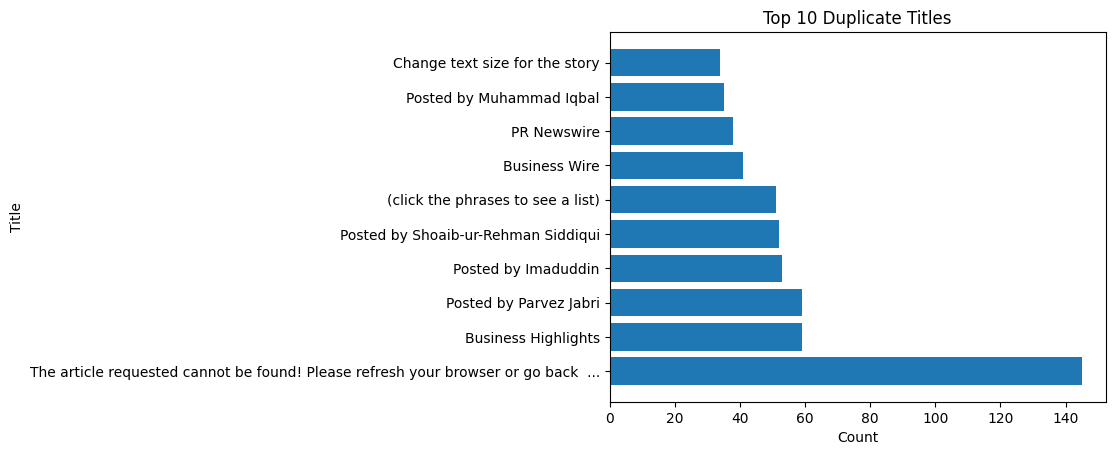

In [ ]:
# Count the occurrences of each title
title_counts = df['TITLE'].value_counts()

# Filter for duplicate titles
duplicate_titles = title_counts[title_counts > 1]

# Select the top 10 duplicate titles
top_duplicate_titles = duplicate_titles.head(10)

# Plot a bar chart of the top 10 duplicate titles
plt.barh(top_duplicate_titles.index, top_duplicate_titles.values)
plt.xlabel('Count')
plt.ylabel('Title')
plt.title('Top 10 Duplicate Titles')
plt.show()




In [ ]:
#There is a column which contains all the URL , looking at the list
df[['URL']]

,URL
0,http://www.latimes.com/business/money/la-fi-mo...
1,http://www.livemint.com/Politics/H2EvwJSK2VE6O...
2,http://www.ifamagazine.com/news/us-open-stocks...
3,http://www.ifamagazine.com/news/fed-risks-fall...
4,http://www.moneynews.com/Economy/federal-reser...
...,...
422414,http://www.cbs3springfield.com/story/26378648/...
422415,http://www.wlwt.com/news/boy-to-have-surgery-o...
422416,http://www.newsnet5.com/news/local-news/child-...
422417,http://www.wfsb.com/story/26368078/phoenix-boy...


In [ ]:
# To display the full URLs without truncation
#These URLs can be used to access the news and do summarization
pd.set_option('display.max_colwidth', None)
print(df[['URL']])

                                                                                                                                        URL
0               http://www.latimes.com/business/money/la-fi-mo-federal-reserve-plosser-stimulus-economy-20140310,0,1312750.story\?track=rss
1                  http://www.livemint.com/Politics/H2EvwJSK2VE6OF7iK1g3PP/Feds-Charles-Plosser-sees-high-bar-for-change-in-pace-of-ta.html
2                               http://www.ifamagazine.com/news/us-open-stocks-fall-after-fed-official-hints-at-accelerated-tapering-294436
3                                            http://www.ifamagazine.com/news/fed-risks-falling-behind-the-curve-charles-plosser-says-294430
4                                  http://www.moneynews.com/Economy/federal-reserve-charles-plosser-weather-job-growth/2014/03/10/id/557011
...                                                                                                                                     ...
422414              

Number of Duplicate Shortened URLs: 411182
Percentage of Duplicate Shortened URLs: 97.34%


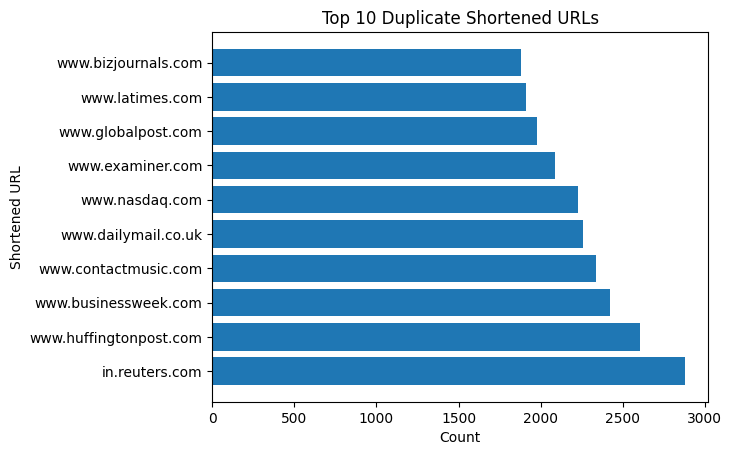

In [ ]:
## Able to see duplicate URLs
import urllib.parse

# Shorten URLs for display
shortened_urls = df['URL'].apply(lambda url: urllib.parse.urlparse(url).netloc)

# Count the number of duplicate shortened URLs
duplicate_url_counts = shortened_urls.duplicated().sum()

# Calculate the percentage of duplicate shortened URLs
duplicate_url_percentage = (duplicate_url_counts / len(shortened_urls)) * 100

# Print the results
print("Number of Duplicate Shortened URLs:", duplicate_url_counts)
print("Percentage of Duplicate Shortened URLs: {:.2f}%".format(duplicate_url_percentage))

# Get the top 10 duplicate shortened URLs with their counts
top_duplicate_urls = shortened_urls.value_counts().head(10)

# Plot a bar chart of the top 10 duplicate shortened URLs
plt.barh(top_duplicate_urls.index, top_duplicate_urls.values)
plt.xlabel('Count')
plt.ylabel('Shortened URL')
plt.title('Top 10 Duplicate Shortened URLs')
plt.show()



In [ ]:
# Find titles with duplicate URLs
import pandas as pd
import urllib.parse

# Find duplicate URLs
duplicate_urls = df[df.duplicated(subset='URL', keep=False)]

# Shorten URLs for display
duplicate_urls['Shortened URL'] = duplicate_urls['URL'].apply(lambda url: urllib.parse.urlparse(url).netloc)

# Group by URL and collect titles as comma-separated values
title_duplicate_url = duplicate_urls.groupby('URL')['TITLE'].apply(lambda x: ', '.join(x)).reset_index()


# Display the table
print(title_duplicate_url)



                                                                                                                                                                                                                                                                                         URL  \
0                                                   http://arstechnica.com/business/2014/04/amazon-offer-workers-2000-to-quit-but-the-incentive-is-nothing-like-zappos/\?utm_source=feedburner&amp;utm_medium=feed&amp;utm_campaign=Feed%3A+arstechnica%2Findex+(Ars+Technica+-+All+content)   
1                                                     http://arstechnica.com/security/2014/04/fingerprint-lock-in-samsung-galaxy-5-easily-defeated-by-whitehat-hackers/\?utm_source=feedburner&amp;utm_medium=feed&amp;utm_campaign=Feed%3A+arstechnica%2Findex+(Ars+Technica+-+All+content)   
2                                                     http://arstechnica.com/tech-policy/2014/06/verizon-wireless-employee-stole-900-pho

<ipython-input-16-25382e94d985>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duplicate_urls['Shortened URL'] = duplicate_urls['URL'].apply(lambda url: urllib.parse.urlparse(url).netloc)


In [ ]:
#Title and category will be used for calssification
# creating a new dataset with only relevant features.
df1 = df[['TITLE','CATEGORY']]
df1.head()

,TITLE,CATEGORY
0,"Fed official says weak data caused by weather, should not slow taper",b
1,Fed's Charles Plosser sees high bar for change in pace of tapering,b
2,US open: Stocks fall after Fed official hints at accelerated tapering,b
3,"Fed risks falling 'behind the curve', Charles Plosser says",b
4,Fed's Plosser: Nasty Weather Has Curbed Job Growth,b


In [ ]:
#shuffling rows with the help of sample, here (frac = 1) means return all rows
df2 = df1.sample(frac=1).reset_index(drop=True)
df2.head()

,TITLE,CATEGORY
0,Alcatel-Lucent: The Way Back To $4.50 Is Wide Open,b
1,Zara pulls shirt resembling 'Star of David',e
2,Trace Adkins' wife files for divorce in Tenn.,e
3,GAS PRICES: Iraq turmoil could drive up Inland rates,b
4,Men's Wearhouse bid of $1.8 billion suits Jos A Bank just fine,b


In [ ]:
#checking for null values
df2.isnull().sum()

TITLE       0
CATEGORY    0
dtype: int64

In [ ]:
# THERE ARE FOUR TYPES OF CATEGORIES-

## b : business (~115000)
## t : science and technology (~110000)
## e : entertainment (~150000)
## m : health (~40000)

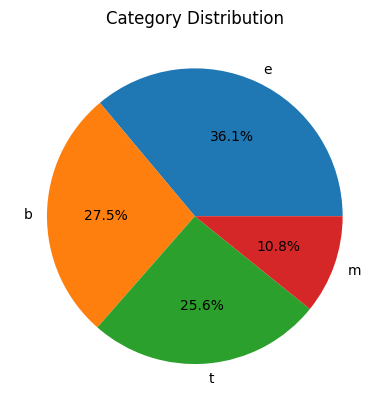

In [ ]:
# Count the number of articles in each category
category_counts = df['CATEGORY'].value_counts()

# Plot a pie chart of category distribution
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%')
plt.title('Category Distribution')
plt.show()

<Axes: xlabel='CATEGORY', ylabel='count'>

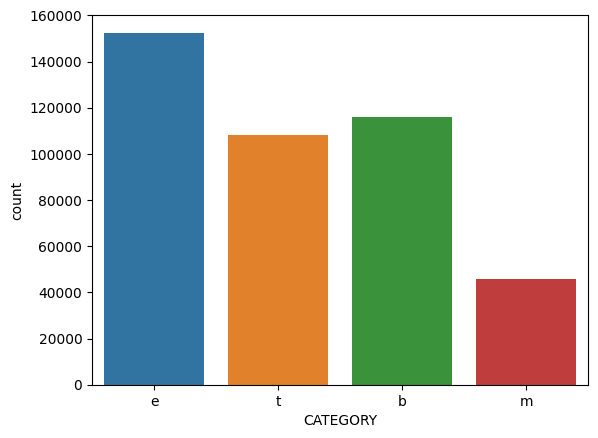

In [ ]:
# Count of articles per category
sns.countplot(x = 'CATEGORY',data = df2)

Number of Unique Publishers: 10985


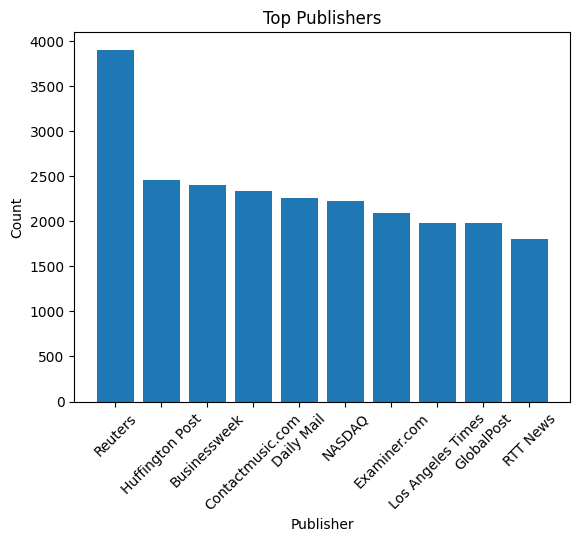

In [ ]:
# Count the number of unique publishers
num_unique_publishers = df['PUBLISHER'].nunique()

# Print the number of unique publishers
print("Number of Unique Publishers:", num_unique_publishers)

# Plot a bar chart of the top publishers
top_publishers = df['PUBLISHER'].value_counts().head(10)
plt.bar(top_publishers.index, top_publishers.values)
plt.xlabel('Publisher')
plt.ylabel('Count')
plt.title('Top Publishers')
plt.xticks(rotation=45)
plt.show()



# DATA CLEANING AND PREPROCESSING

**Motivation for Data Cleaning in Column Headers of the News Aggregator Dataset**

Performing data cleaning on the column headers of the News Aggregator Dataset from Kaggle is essential for ensuring data quality, clarity, and usability. Cleaning the column headers addresses various issues that can arise from inconsistencies, inaccuracies, or ambiguities in the column names. Here are the motivations for data cleaning in the column headers:

Consistency and Standardization: Data cleaning helps to ensure consistent and standardized column headers across the dataset. It involves checking for any discrepancies or variations in the column names and applying standard naming conventions. Consistent column headers make it easier for users to understand and work with the dataset, improving data comprehension and facilitating data integration with other sources.

Eliminating Spelling and Typographical Errors: Column headers may contain spelling mistakes, typographical errors, or inconsistent capitalization. Data cleaning involves identifying and rectifying such errors, improving the readability and professionalism of the dataset. Correcting these errors reduces the risk of misinterpretation and confusion when referring to specific attributes.

Removing Special Characters and Whitespaces: Column headers might include special characters, symbols, or whitespaces that can hinder data processing and analysis. Data cleaning helps to remove or replace such characters, ensuring that the column headers are machine-readable and can be easily used in programming or query operations

In [6]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [11]:
 from nltk.corpus import stopwords
 from nltk.tokenize import word_tokenize
 import string
 from nltk.stem import PorterStemmer
 from tensorflow.keras.preprocessing.text import Tokenizer
 from tensorflow.keras.preprocessing.sequence import pad_sequences
 from tensorflow.keras.utils import to_categorical

In [12]:
def cleaning_text(text):
    punctuations = list(string.punctuation)
    punctuations.append('...')

    # Remove email addresses
    regex_remove_email = r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Za-z]{2,}\b'
    text = text.strip()
    text = re.sub(regex_remove_email, '', text, flags=re.MULTILINE)

    regex_remove_hyperlinks = r'((https|http)://|www\.)[A-Za-z0-9.:/-]*'
    text = re.sub(regex_remove_hyperlinks, '', text)
    text = text.lower()

    # Remove time
    regex_remove_time = r'\d{2}:\d{2}(:\d{2})?(\s+(\+|-)\d{0,4})?'
    text = re.sub(regex_remove_time, '', text)

    # Remove IP addresses
    regex_remove_ip = r'\d{1,4}.\d{1,4}.\d{1,4}.\d{1,4}'
    text = re.sub(regex_remove_ip, '', text)

    regex_hash = r'#'
    text = re.sub(regex_hash, '', text)

    regex_symbol = r'>'
    text = re.sub(regex_symbol, '', text)

    regex_string_beginning = r"^b['\"]"
    text = re.sub(regex_string_beginning, '', text)

    tokens = word_tokenize(text)

    non_symbol_pattern = r'^[!"#]'  # Matches if the token contains only non-word characters
    non_digit_pattern = r'^\d+((\.|,)\d*)?$'

    # The second step removes stopwords and punctuation
    stopwords_english = stopwords.words('english')

    cleaned_tokens = []
    for token in tokens:
        if token in stopwords_english or token in punctuations:
            continue
        elif bool(re.match(non_symbol_pattern, token)) or bool(re.match(non_digit_pattern, token)):
            continue
        else:
            cleaned_tokens.append(token)

    # Stem tokens
    stemmer = PorterStemmer()
    for i, word in enumerate(cleaned_tokens):
        cleaned_tokens[i] = stemmer.stem(word)

    return (' ').join(cleaned_tokens)


In [13]:
df2=df[['TITLE','CATEGORY']]

In [14]:
df2

,TITLE,CATEGORY
0,"Fed official says weak data caused by weather,...",b
1,Fed's Charles Plosser sees high bar for change...,b
2,US open: Stocks fall after Fed official hints ...,b
3,"Fed risks falling 'behind the curve', Charles ...",b
4,Fed's Plosser: Nasty Weather Has Curbed Job Gr...,b
...,...,...
422414,Surgeons to remove 4-year-old's rib to rebuild...,m
422415,Boy to have surgery on esophagus after battery...,m
422416,Child who swallowed battery to have reconstruc...,m
422417,Phoenix boy undergoes surgery to repair throat...,m


In [15]:
df2['title_cleaned']=df2['TITLE'].apply(cleaning_text)

<ipython-input-15-c1aa3b48cd90>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['title_cleaned']=df2['TITLE'].apply(cleaning_text)


In [16]:
df2.head()

,TITLE,CATEGORY,title_cleaned
0,"Fed official says weak data caused by weather,...",b,fed offici say weak data caus weather slow taper
1,Fed's Charles Plosser sees high bar for change...,b,fed 's charl plosser see high bar chang pace t...
2,US open: Stocks fall after Fed official hints ...,b,us open stock fall fed offici hint acceler taper
3,"Fed risks falling 'behind the curve', Charles ...",b,fed risk fall 'behind curv charl plosser say
4,Fed's Plosser: Nasty Weather Has Curbed Job Gr...,b,fed 's plosser nasti weather curb job growth


In [17]:
df2['title_cleaned'].values

array(['fed offici say weak data caus weather slow taper',
       "fed 's charl plosser see high bar chang pace taper",
       'us open stock fall fed offici hint acceler taper', ...,
       'child swallow batteri reconstruct surgeri cincinnati',
       'phoenix boy undergo surgeri repair throat damag wfsb connecticut',
       'phoenix boy undergo surgeri repair throat damag cb springfield'],
      dtype=object)

In [18]:
df3=df2.sample(frac=0.5,ignore_index=True)

In [31]:
from nltk.tag import pos_tag
def Convert2Seq(df, max_len=100):
    gen_text = df['title_cleaned'].values
    gen_text = ' '.join(gen_text.tolist())

    n_most_common_words = 8000
    max_len = 130
    tokenizer = Tokenizer(num_words=n_most_common_words, lower=True)
    tokenizer.fit_on_texts(df3['TITLE'].values)
    sequences = tokenizer.texts_to_sequences(df['TITLE'].values)
    word_index = tokenizer.word_index
    print('Found %s unique tokens.' % len(word_index))

    X = pad_sequences(sequences, maxlen=max_len)

    return X


In [32]:
X=Convert2Seq(df3)

Found 57095 unique tokens.


In [33]:
X

array([[   0,    0,    0, ...,   24, 1592, 2622],
       [   0,    0,    0, ..., 6956,  408, 4892],
       [   0,    0,    0, ...,  468,  423,  459],
       ...,
       [   0,    0,    0, ..., 2573,  390, 2740],
       [   0,    0,    0, ...,   70,   43,  236],
       [   0,    0,    0, ...,    9,   13, 1158]], dtype=int32)

# SPLIT DATA

In [34]:
from sklearn.model_selection import train_test_split


Convert labels to appropriate format

In [23]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
lables=to_categorical(lb.fit_transform(df3['CATEGORY'].values))


In [24]:
df3['CATEGORY'].unique()

array(['t', 'e', 'b', 'm'], dtype=object)

In [25]:
X_train,X_test,y_train,y_test=train_test_split(X,lables,test_size=0.2,random_state=42)


# BUILD AND FIT NEURAL NETWORK

## GRU

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Dense, GRU, Embedding, SpatialDropout1D

In [27]:
X_train[0].shape

(130,)

In [28]:
# Define the filepath to save the best model
filepath = 'best_model.h5'

# Create the ModelCheckpoint callback
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)


In [35]:
epochs = 10
emb_dim = 128
batch_size = 256


In [36]:
model=Sequential()
model.add(Embedding(8000, emb_dim, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.7))
model.add(GRU(128,return_sequences=True))
model.add(GRU(128))
model.add(Dense(4,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 130, 128)          1024000   
                                                                 
 spatial_dropout1d_4 (Spatia  (None, 130, 128)         0         
 lDropout1D)                                                     
                                                                 
 gru_6 (GRU)                 (None, 130, 128)          99072     
                                                                 
 gru_7 (GRU)                 (None, 128)               99072     
                                                                 
 dense_4 (Dense)             (None, 4)                 516       
                                                                 
Total params: 1,222,660
Trainable params: 1,222,660
Non-trainable params: 0
____________________________________________

In [ ]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), callbacks=[checkpoint])


Epoch 1/10
4951/4951 [==============================] - ETA: 0s - loss: 0.3246 - accuracy: 0.8836
Epoch 1: val_accuracy improved from -inf to 0.92158, saving model to best_model.h5
4951/4951 [==============================] - 804s 162ms/step - loss: 0.3246 - accuracy: 0.8836 - val_loss: 0.2235 - val_accuracy: 0.9216
Epoch 2/10
4951/4951 [==============================] - ETA: 0s - loss: 0.2157 - accuracy: 0.9243
Epoch 2: val_accuracy improved from 0.92158 to 0.92743, saving model to best_model.h5
4951/4951 [==============================] - 820s 166ms/step - loss: 0.2157 - accuracy: 0.9243 - val_loss: 0.2067 - val_accuracy: 0.9274
Epoch 3/10
4951/4951 [==============================] - ETA: 0s - loss: 0.1925 - accuracy: 0.9321
Epoch 3: val_accuracy improved from 0.92743 to 0.92974, saving model to best_model.h5
4951/4951 [==============================] - 831s 168ms/step - loss: 0.1925 - accuracy: 0.9321 - val_loss: 0.2039 - val_accuracy: 0.9297
Epoch 4/10
4951/4951 [==================

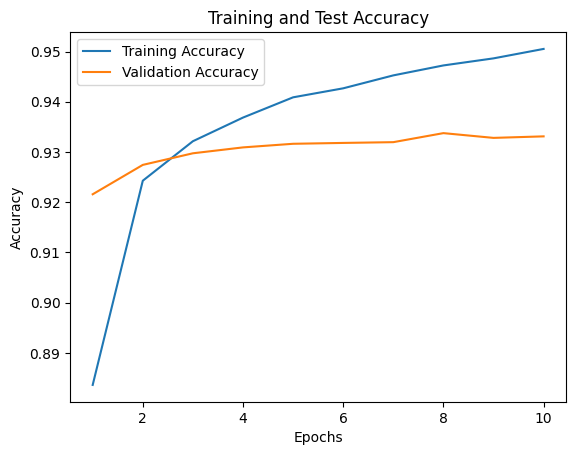

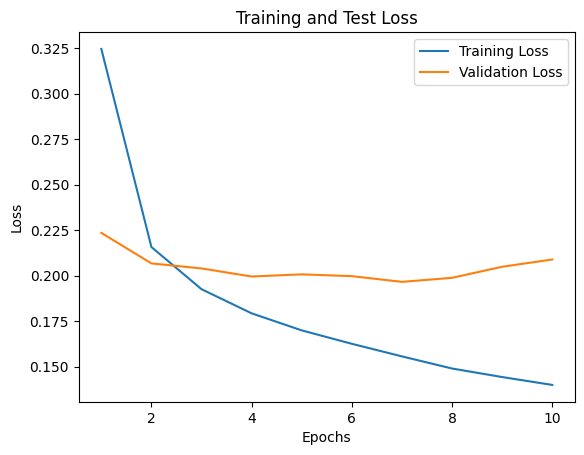

In [ ]:
# Access the training history
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot accuracy
plt.plot(range(1, len(accuracy) + 1), accuracy, label='Training Accuracy')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, label='Validation Accuracy')
plt.title('Training and Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(range(1, len(loss) + 1), loss, label='Training Loss')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')
plt.title('Training and Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


## CNN

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Embedding, SpatialDropout1D,Flatten
from keras.layers import Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dense

In [27]:
X_train[0].shape

(130,)

In [38]:
# Define the filepath to save the best model
filepath = 'best_CNN_model.h5'

# Create the ModelCheckpoint callback
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)


In [29]:
epochs = 10
emb_dim = 128
batch_size = 256
n_most_common_words = 8000

In [36]:
model = Sequential()
model.add(Embedding(n_most_common_words, emb_dim, input_length=X.shape[1]))
model.add(Conv1D(32, 3, padding='same', activation='relu'))
model.add(MaxPooling1D())
model.add(Flatten())
model.add(Dense(250, activation='relu'))
model.add(Dense(4, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 130, 128)          1024000   
                                                                 
 conv1d (Conv1D)             (None, 130, 32)           12320     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 65, 32)           0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 2080)              0         
                                                                 
 dense (Dense)               (None, 250)               520250    
                                                                 
 dense_1 (Dense)             (None, 4)                 1004      
                                                        

In [ ]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), callbacks=[checkpoint])


Epoch 1/10
5281/5281 [==============================] - ETA: 0s - loss: 0.2771 - accuracy: 0.8985
Epoch 1: val_accuracy improved from -inf to 0.92538, saving model to best_CNN_model.h5
5281/5281 [==============================] - 52s 7ms/step - loss: 0.2771 - accuracy: 0.8985 - val_loss: 0.2092 - val_accuracy: 0.9254
Epoch 2/10
5281/5281 [==============================] - ETA: 0s - loss: 0.1671 - accuracy: 0.9401
Epoch 2: val_accuracy improved from 0.92538 to 0.93019, saving model to best_CNN_model.h5
5281/5281 [==============================] - 23s 4ms/step - loss: 0.1671 - accuracy: 0.9401 - val_loss: 0.2019 - val_accuracy: 0.9302
Epoch 3/10
5281/5281 [==============================] - ETA: 0s - loss: 0.1180 - accuracy: 0.9566
Epoch 3: val_accuracy did not improve from 0.93019
5281/5281 [==============================] - 22s 4ms/step - loss: 0.1180 - accuracy: 0.9566 - val_loss: 0.2225 - val_accuracy: 0.9300
Epoch 4/10
5281/5281 [==============================] - ETA: 0s - loss: 0.07

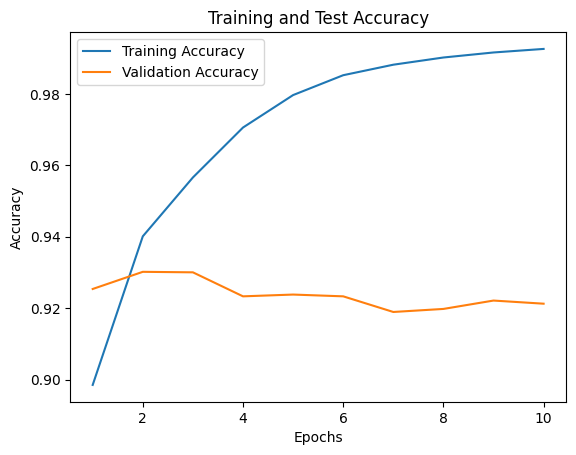

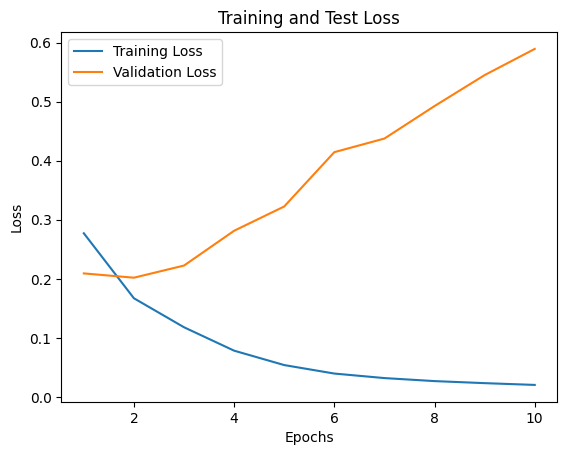

In [ ]:
# Access the training history
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot accuracy
plt.plot(range(1, len(accuracy) + 1), accuracy, label='Training Accuracy')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, label='Validation Accuracy')
plt.title('Training and Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(range(1, len(loss) + 1), loss, label='Training Loss')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')
plt.title('Training and Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


Nadam

In [32]:
model.compile(loss='categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])
history2 = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), callbacks=[checkpoint])


Epoch 1/10
5281/5281 [==============================] - ETA: 0s - loss: 0.2808 - accuracy: 0.8977
Epoch 1: val_accuracy improved from -inf to 0.92664, saving model to best_CNN_model.h5
5281/5281 [==============================] - 58s 9ms/step - loss: 0.2808 - accuracy: 0.8977 - val_loss: 0.2139 - val_accuracy: 0.9266
Epoch 2/10
5281/5281 [==============================] - ETA: 0s - loss: 0.1668 - accuracy: 0.9397
Epoch 2: val_accuracy improved from 0.92664 to 0.92934, saving model to best_CNN_model.h5
5281/5281 [==============================] - 26s 5ms/step - loss: 0.1668 - accuracy: 0.9397 - val_loss: 0.2020 - val_accuracy: 0.9293
Epoch 3/10
5281/5281 [==============================] - ETA: 0s - loss: 0.1170 - accuracy: 0.9571
Epoch 3: val_accuracy improved from 0.92934 to 0.92964, saving model to best_CNN_model.h5
5281/5281 [==============================] - 25s 5ms/step - loss: 0.1170 - accuracy: 0.9571 - val_loss: 0.2233 - val_accuracy: 0.9296
Epoch 4/10
5272/5281 [===============

Adadelta

In [39]:
model.compile(loss='categorical_crossentropy', optimizer='adadelta', metrics=['accuracy'])
history3 = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), callbacks=[checkpoint])


Epoch 1/10
5281/5281 [==============================] - ETA: 0s - loss: 1.3109 - accuracy: 0.3587
Epoch 1: val_accuracy improved from -inf to 0.36329, saving model to best_CNN_model.h5
5281/5281 [==============================] - 33s 6ms/step - loss: 1.3109 - accuracy: 0.3587 - val_loss: 1.3123 - val_accuracy: 0.3633
Epoch 2/10
5281/5281 [==============================] - ETA: 0s - loss: 1.3105 - accuracy: 0.3587
Epoch 2: val_accuracy did not improve from 0.36329
5281/5281 [==============================] - 22s 4ms/step - loss: 1.3105 - accuracy: 0.3587 - val_loss: 1.3118 - val_accuracy: 0.3633
Epoch 3/10
5281/5281 [==============================] - ETA: 0s - loss: 1.3100 - accuracy: 0.3587
Epoch 3: val_accuracy did not improve from 0.36329
5281/5281 [==============================] - 21s 4ms/step - loss: 1.3100 - accuracy: 0.3587 - val_loss: 1.3114 - val_accuracy: 0.3633
Epoch 4/10
5281/5281 [==============================] - ETA: 0s - loss: 1.3094 - accuracy: 0.3587
Epoch 4: val_accu

Adagrad

In [40]:
model.compile(loss='categorical_crossentropy', optimizer='adagrad', metrics=['accuracy'])
history3 = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), callbacks=[checkpoint])


Epoch 1/10
5281/5281 [==============================] - ETA: 0s - loss: 1.2966 - accuracy: 0.3601
Epoch 1: val_accuracy improved from 0.36329 to 0.36393, saving model to best_CNN_model.h5
5281/5281 [==============================] - 33s 6ms/step - loss: 1.2966 - accuracy: 0.3601 - val_loss: 1.2891 - val_accuracy: 0.3639
Epoch 2/10
5281/5281 [==============================] - ETA: 0s - loss: 1.2695 - accuracy: 0.4076
Epoch 2: val_accuracy improved from 0.36393 to 0.45450, saving model to best_CNN_model.h5
5281/5281 [==============================] - 22s 4ms/step - loss: 1.2695 - accuracy: 0.4076 - val_loss: 1.2447 - val_accuracy: 0.4545
Epoch 3/10
5281/5281 [==============================] - ETA: 0s - loss: 1.1902 - accuracy: 0.5029
Epoch 3: val_accuracy improved from 0.45450 to 0.54342, saving model to best_CNN_model.h5
5281/5281 [==============================] - 21s 4ms/step - loss: 1.1902 - accuracy: 0.5029 - val_loss: 1.1221 - val_accuracy: 0.5434
Epoch 4/10
5281/5281 [============

In [41]:
history3 = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), callbacks=[checkpoint])


Epoch 1/10
5281/5281 [==============================] - ETA: 0s - loss: 0.4414 - accuracy: 0.8484
Epoch 1: val_accuracy improved from 0.83358 to 0.85069, saving model to best_CNN_model.h5
5281/5281 [==============================] - 22s 4ms/step - loss: 0.4414 - accuracy: 0.8484 - val_loss: 0.4399 - val_accuracy: 0.8507
Epoch 2/10
5281/5281 [==============================] - ETA: 0s - loss: 0.4131 - accuracy: 0.8616
Epoch 2: val_accuracy improved from 0.85069 to 0.85914, saving model to best_CNN_model.h5
5281/5281 [==============================] - 21s 4ms/step - loss: 0.4131 - accuracy: 0.8616 - val_loss: 0.4172 - val_accuracy: 0.8591
Epoch 3/10
5281/5281 [==============================] - ETA: 0s - loss: 0.3901 - accuracy: 0.8716
Epoch 3: val_accuracy improved from 0.85914 to 0.86629, saving model to best_CNN_model.h5
5281/5281 [==============================] - 21s 4ms/step - loss: 0.3901 - accuracy: 0.8716 - val_loss: 0.3984 - val_accuracy: 0.8663
Epoch 4/10
5273/5281 [============

In [42]:
history3 = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), callbacks=[checkpoint])


Epoch 1/10
5278/5281 [============================>.] - ETA: 0s - loss: 0.2797 - accuracy: 0.9101
Epoch 1: val_accuracy improved from 0.89832 to 0.90128, saving model to best_CNN_model.h5
5281/5281 [==============================] - 21s 4ms/step - loss: 0.2797 - accuracy: 0.9101 - val_loss: 0.3071 - val_accuracy: 0.9013
Epoch 2/10
5280/5281 [============================>.] - ETA: 0s - loss: 0.2705 - accuracy: 0.9130
Epoch 2: val_accuracy improved from 0.90128 to 0.90367, saving model to best_CNN_model.h5
5281/5281 [==============================] - 21s 4ms/step - loss: 0.2705 - accuracy: 0.9130 - val_loss: 0.2996 - val_accuracy: 0.9037
Epoch 3/10
5278/5281 [============================>.] - ETA: 0s - loss: 0.2621 - accuracy: 0.9156
Epoch 3: val_accuracy improved from 0.90367 to 0.90509, saving model to best_CNN_model.h5
5281/5281 [==============================] - 21s 4ms/step - loss: 0.2621 - accuracy: 0.9156 - val_loss: 0.2927 - val_accuracy: 0.9051
Epoch 4/10
5280/5281 [============

## RNN

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Dense, Embedding, SpatialDropout1D
from keras.layers import SimpleRNN

In [41]:
X_train[0].shape

(130,)

In [42]:
# Define the filepath to save the best model
filepath = 'best_RNN_model.h5'

# Create the ModelCheckpoint callback
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)

In [43]:
epochs = 10
emb_dim = 128
batch_size = 256
n_most_common_words = 8000

In [44]:
model = Sequential()
model.add(Embedding(n_most_common_words, emb_dim, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.7))
model.add(SimpleRNN(128, return_sequences=True))
model.add(SimpleRNN(128))
model.add(Dense(4, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])



In [50]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 130, 128)          1024000   
                                                                 
 spatial_dropout1d (SpatialD  (None, 130, 128)         0         
 ropout1D)                                                       
                                                                 
 simple_rnn (SimpleRNN)      (None, 130, 128)          32896     
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 128)               32896     
                                                                 
 dense_4 (Dense)             (None, 4)                 516       
                                                                 
Total params: 1,090,308
Trainable params: 1,090,308
Non-trainable params: 0
____________________________________________

In [ ]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), callbacks=[checkpoint])


Epoch 1/10
5281/5281 [==============================] - ETA: 0s - loss: 0.6366 - accuracy: 0.7340
Epoch 1: val_accuracy improved from -inf to 0.90079, saving model to best_model.h5
5281/5281 [==============================] - 1507s 284ms/step - loss: 0.6366 - accuracy: 0.7340 - val_loss: 0.2823 - val_accuracy: 0.9008
Epoch 2/10
5281/5281 [==============================] - ETA: 0s - loss: 0.3071 - accuracy: 0.8956
Epoch 2: val_accuracy improved from 0.90079 to 0.91094, saving model to best_model.h5
5281/5281 [==============================] - 1482s 281ms/step - loss: 0.3071 - accuracy: 0.8956 - val_loss: 0.2667 - val_accuracy: 0.9109
Epoch 3/10
5281/5281 [==============================] - ETA: 0s - loss: 0.2871 - accuracy: 0.9019
Epoch 3: val_accuracy did not improve from 0.91094
5281/5281 [==============================] - 1474s 279ms/step - loss: 0.2871 - accuracy: 0.9019 - val_loss: 0.3209 - val_accuracy: 0.8970
Epoch 4/10
5281/5281 [==============================] - ETA: 0s - loss: 

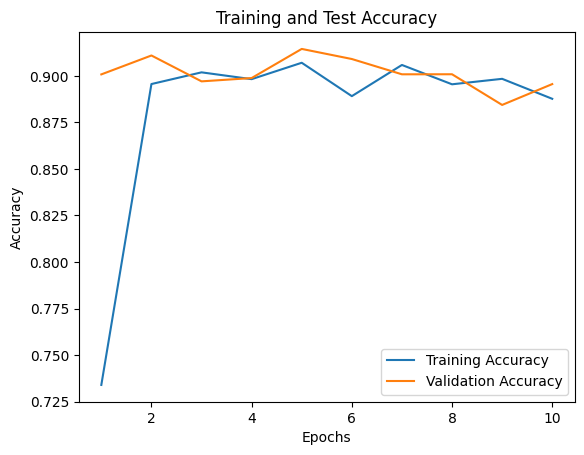

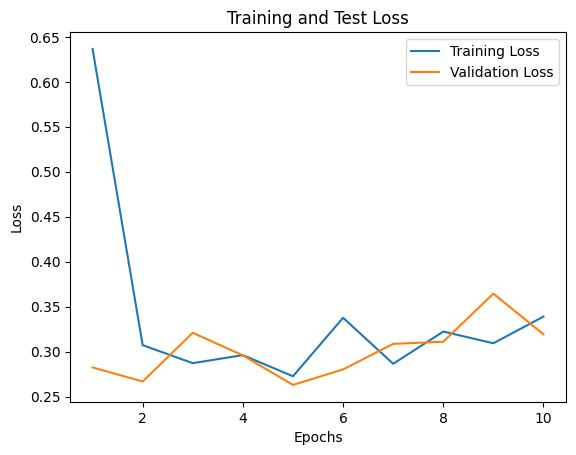

In [ ]:
# Access the training history
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot accuracy
plt.plot(range(1, len(accuracy) + 1), accuracy, label='Training Accuracy')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, label='Validation Accuracy')
plt.title('Training and Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(range(1, len(loss) + 1), loss, label='Training Loss')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')
plt.title('Training and Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


## DISTILBERT

In [ ]:
!pip install transformers


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 51.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 21.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 80.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 58.9 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
from transformers import TFDistilBertModel, DistilBertTokenizer
from tensorflow.keras.callbacks import ModelCheckpoint

#Load the pre-trained
model_name='distilbert-base-uncased'
tokenizer = DistilBertTokenizer.from_pretrained(model_name)
distilbert_model = TFDistilBertModel.from_pretrained(model_name)

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertModel: ['vocab_projector.bias', 'vocab_transform.bias', 'vocab_layer_norm.bias', 'vocab_transform.weight', 'vocab_layer_norm.weight']
- This IS expected if you are initializing TFDistilBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFDistilBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.


In [ ]:
df3.head()


,TITLE,CATEGORY,title_cleaned
0,Oculus Founders Talk Facebook Acquisition; Gam...,0.0,oculu founder talk facebook acquisit game stil...
1,CEO says GM changing recall process after 'ter...,1.0,ceo say gm chang recal process 'terribl thing ...
2,Actress Kristen Bell is expecting her second c...,0.0,actress kristen bell expect second child husba...
3,Meteor Shower to Light Up Friday Night's Sky,0.0,meteor shower light friday night 's sky
4,TV ratings: 'Voice' and 'Dancing' finales down...,0.0,tv rate 'voic 'danc final last year


In [ ]:
lables

array([[0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       ...,
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.]], dtype=float32)

In [ ]:
df3['CATEGORY']=lables.tolist()

In [ ]:
df4=df3.sample(frac=0.35)

In [ ]:
df4

,TITLE,CATEGORY,title_cleaned
76683,Coca-Cola Won't Go Private: Warren Buffett,"[1.0, 0.0, 0.0, 0.0]",coca-cola wo n't go privat warren buffett
114810,Here's the story behind those Kimye in Ireland...,"[0.0, 1.0, 0.0, 0.0]",'s stori behind kimy ireland photo
10121,Posted by Parvez Jabri,"[1.0, 0.0, 0.0, 0.0]",post parvez jabri
24527,"Holder: Banks Aren't 'Too Big to Jail', & More","[1.0, 0.0, 0.0, 0.0]",holder bank n't 'too big jail
166943,Segel quit Twitter over burrito backlash,"[0.0, 1.0, 0.0, 0.0]",segel quit twitter burrito backlash
...,...,...,...
134529,Boeing Results Get Boost From Increase in Comm...,"[1.0, 0.0, 0.0, 0.0]",boe result get boost increas commerci jet product
200050,"Listen to Ariana Grande, Nicki Minaj, Jessie J...","[0.0, 1.0, 0.0, 0.0]",listen ariana grand nicki minaj jessi j 's cha...
10191,American Postal Workers Union to protest mail ...,"[1.0, 0.0, 0.0, 0.0]",american postal worker union protest mail serv...
134340,Michigan in top ten for painkiller prescriptions,"[0.0, 0.0, 1.0, 0.0]",michigan top ten painkil prescript


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(df4['title_cleaned'],df4['CATEGORY'],test_size=0.2,random_state=42)

In [ ]:
max_length=130

In [ ]:
# Prepare the training data
train_input_ids = tokenizer.batch_encode_plus(X_train,
                                              padding='longest',
                                              truncation=True,
                                              max_length=max_length)['input_ids']
train_attention_mask = tokenizer.batch_encode_plus(X_train,
                                                   padding='longest',
                                                   truncation=True,
                                                   max_length=max_length)['attention_mask']

In [ ]:
train_labels=np.array(y_train)
test_labels=np.array(y_test)

In [ ]:
# Create the model architecture
input_ids = tf.keras.layers.Input(shape=(max_length,), dtype=tf.int32)
attention_mask = tf.keras.layers.Input(shape=(max_length,), dtype=tf.int32)

In [ ]:
num_classes=4

In [ ]:
distilbert_output = distilbert_model(input_ids=input_ids, attention_mask=attention_mask)[0]
pooled_output = tf.keras.layers.GlobalAveragePooling1D()(distilbert_output)
dropout = tf.keras.layers.Dropout(0.1)(pooled_output)
outputs = tf.keras.layers.Dense(num_classes, activation='softmax')(dropout)

model = tf.keras.models.Model(inputs=[input_ids, attention_mask], outputs=outputs)

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
model.summary()

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_13 (InputLayer)          [(None, 130)]        0           []                               
                                                                                                  
 input_14 (InputLayer)          [(None, 130)]        0           []                               
                                                                                                  
 tf_distil_bert_model_2 (TFDist  TFBaseModelOutput(l  66362880   ['input_13[0][0]',               
 ilBertModel)                   ast_hidden_state=(N               'input_14[0][0]']               
                                one, 130, 768),                                                   
                                 hidden_states=None                                         

In [ ]:
import numpy as np

train_input_ids = np.array(train_input_ids)
train_attention_mask = np.array(train_attention_mask)


In [ ]:
for i, label in enumerate(train_labels):
  train_labels[i]=np.array(label)

In [ ]:
test_input_ids = tokenizer.batch_encode_plus(
    X_test,
    padding='max_length',
    truncation=True,
    max_length=130
)['input_ids']


test_attention_mask = tokenizer.batch_encode_plus(X_test,
                                                  padding='max_length',
                                                  truncation=True,
                                                  max_length=max_length)['attention_mask']
test_labels = np.vstack(test_labels)
test_input_ids = np.array(test_input_ids)
test_attention_mask = np.array(test_attention_mask)

In [ ]:
checkpoint= ModelCheckpoint('best_disitilbet.h5',monitor='val_accuracy',save_best_only=True,mode='max',verbose=1)

In [ ]:
train_labels = np.vstack(train_labels)


In [ ]:
history=model.fit([train_input_ids, train_attention_mask], train_labels, epochs=3, batch_size=32, callbacks=[checkpoint], validation_data=([test_input_ids,test_attention_mask],test_labels))


Epoch 1/3
1849/1849 [==============================] - ETA: 0s - loss: 0.3194 - accuracy: 0.8878
Epoch 1: val_accuracy improved from -inf to 0.90659, saving model to best_disitilbet.h5
1849/1849 [==============================] - 4634s 3s/step - loss: 0.3194 - accuracy: 0.8878 - val_loss: 0.2745 - val_accuracy: 0.9066
Epoch 2/3
1849/1849 [==============================] - ETA: 0s - loss: 0.1989 - accuracy: 0.9299
Epoch 2: val_accuracy improved from 0.90659 to 0.91924, saving model to best_disitilbet.h5
1849/1849 [==============================] - 3878s 2s/step - loss: 0.1989 - accuracy: 0.9299 - val_loss: 0.2364 - val_accuracy: 0.9192
Epoch 3/3
1849/1849 [==============================] - ETA: 0s - loss: 0.1366 - accuracy: 0.9517
Epoch 3: val_accuracy improved from 0.91924 to 0.92479, saving model to best_disitilbet.h5
1849/1849 [==============================] - 3931s 2s/step - loss: 0.1366 - accuracy: 0.9517 - val_loss: 0.2342 - val_accuracy: 0.9248


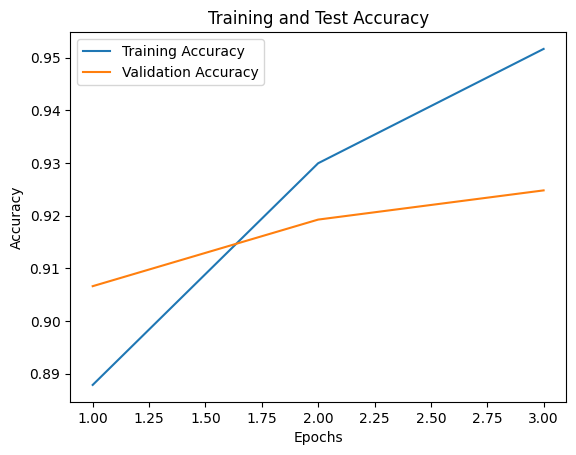

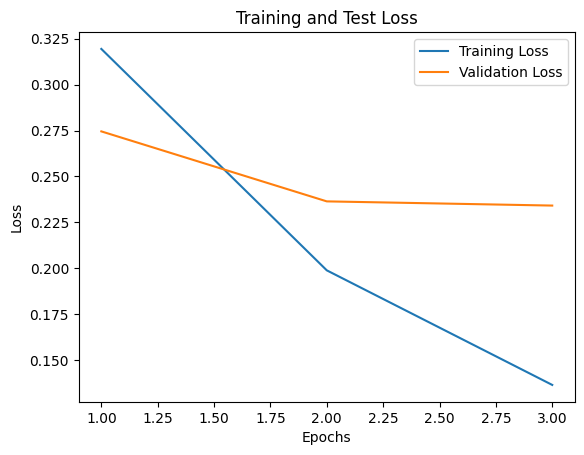

In [ ]:
# Access the training history
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot accuracy
plt.plot(range(1, len(accuracy) + 1), accuracy, label='Training Accuracy')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, label='Validation Accuracy')
plt.title('Training and Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(range(1, len(loss) + 1), loss, label='Training Loss')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')
plt.title('Training and Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


## LSTM


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Dense, GRU, Embedding, SpatialDropout1D, LSTM

In [ ]:
X_train[0].shape

(130,)

In [ ]:
# Define the filepath to save the best model
filepath = 'best_model.h5'

# Create the ModelCheckpoint callback
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)


In [ ]:
epochs = 10
emb_dim = 128
batch_size = 256


In [ ]:
model=Sequential()
model.add(Embedding(8000, emb_dim, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.7))
model.add(LSTM(128,return_sequences=True))
model.add(LSTM(128))
model.add(Dense(4,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 130, 128)          1024000   
                                                                 
 spatial_dropout1d (SpatialD  (None, 130, 128)         0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 130, 128)          131584    
                                                                 
 lstm_1 (LSTM)               (None, 128)               131584    
                                                                 
 dense (Dense)               (None, 4)                 516       
                                                                 
Total params: 1,287,684
Trainable params: 1,287,684
Non-trainable params: 0
______________________________________________

In [ ]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), callbacks=[checkpoint])


Epoch 1/10
5281/5281 [==============================] - ETA: 0s - loss: 0.3294 - accuracy: 0.8806
Epoch 1: val_accuracy improved from -inf to 0.92297, saving model to best_model.h6


5281/5281 [==============================] - 94s 16ms/step - loss: 0.3294 - accuracy: 0.8806 - val_loss: 0.2167 - val_accuracy: 0.9230
Epoch 2/10
5281/5281 [==============================] - ETA: 0s - loss: 0.2177 - accuracy: 0.9248
Epoch 2: val_accuracy improved from 0.92297 to 0.92595, saving model to best_model.h6


5281/5281 [==============================] - 73s 14ms/step - loss: 0.2177 - accuracy: 0.9248 - val_loss: 0.2058 - val_accuracy: 0.9260
Epoch 3/10
5281/5281 [==============================] - ETA: 0s - loss: 0.1967 - accuracy: 0.9315
Epoch 3: val_accuracy improved from 0.92595 to 0.92832, saving model to best_model.h6


5281/5281 [==============================] - 72s 14ms/step - loss: 0.1967 - accuracy: 0.9315 - val_loss: 0.1988 - val_accuracy: 0.9283
Epoch 4/10
5281/5281 [==============================] - ETA: 0s - loss: 0.1818 - accuracy: 0.9365
Epoch 4: val_accuracy improved from 0.92832 to 0.93258, saving model to best_model.h6


5281/5281 [==============================] - 72s 14ms/step - loss: 0.1818 - accuracy: 0.9365 - val_loss: 0.1959 - val_accuracy: 0.9326
Epoch 5/10
5281/5281 [==============================] - ETA: 0s - loss: 0.1703 - accuracy: 0.9401
Epoch 5: val_accuracy improved from 0.93258 to 0.93331, saving model to best_model.h6


5281/5281 [==============================] - 72s 14ms/step - loss: 0.1703 - accuracy: 0.9401 - val_loss: 0.1919 - val_accuracy: 0.9333
Epoch 6/10
5281/5281 [==============================] - ETA: 0s - loss: 0.1628 - accuracy: 0.9423
Epoch 6: val_accuracy did not improve from 0.93331
5281/5281 [==============================] - 64s 12ms/step - loss: 0.1628 - accuracy: 0.9423 - val_loss: 0.2009 - val_accuracy: 0.9331
Epoch 7/10
5281/5281 [==============================] - ETA: 0s - loss: 0.1559 - accuracy: 0.9451
Epoch 7: val_accuracy improved from 0.93331 to 0.93497, saving model to best_model.h6


5281/5281 [==============================] - 71s 13ms/step - loss: 0.1559 - accuracy: 0.9451 - val_loss: 0.1878 - val_accuracy: 0.9350
Epoch 8/10
5280/5281 [============================>.] - ETA: 0s - loss: 0.1506 - accuracy: 0.9464
Epoch 8: val_accuracy did not improve from 0.93497
5281/5281 [==============================] - 63s 12ms/step - loss: 0.1506 - accuracy: 0.9464 - val_loss: 0.1936 - val_accuracy: 0.9343
Epoch 9/10
5281/5281 [==============================] - ETA: 0s - loss: 0.1469 - accuracy: 0.9475
Epoch 9: val_accuracy improved from 0.93497 to 0.93622, saving model to best_model.h6


5281/5281 [==============================] - 70s 13ms/step - loss: 0.1469 - accuracy: 0.9475 - val_loss: 0.1957 - val_accuracy: 0.9362
Epoch 10/10
5277/5281 [============================>.] - ETA: 0s - loss: 0.1411 - accuracy: 0.9494
Epoch 10: val_accuracy did not improve from 0.93622
5281/5281 [==============================] - 63s 12ms/step - loss: 0.1411 - accuracy: 0.9494 - val_loss: 0.2007 - val_accuracy: 0.9345


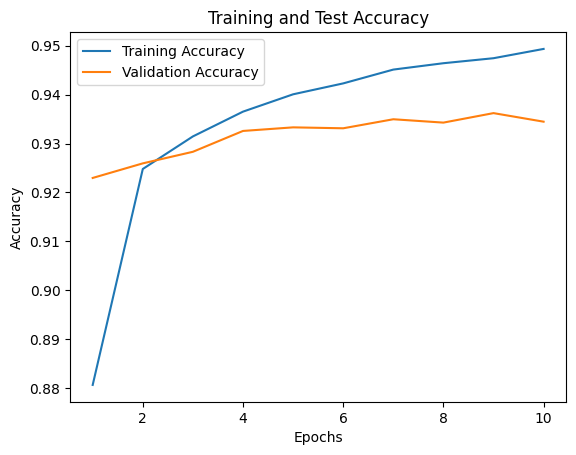

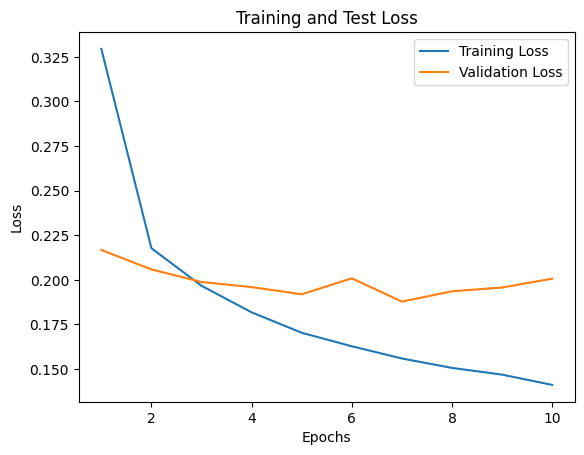

In [ ]:
# Access the training history
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot accuracy
plt.plot(range(1, len(accuracy) + 1), accuracy, label='Training Accuracy')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, label='Validation Accuracy')
plt.title('Training and Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(range(1, len(loss) + 1), loss, label='Training Loss')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')
plt.title('Training and Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
